In [32]:
%matplotlib inline

In [33]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [34]:
# Files to load
city_data_path = "Resources/city_data.csv"
ride_data_path = "Resources/ride_data.csv"

In [35]:
# Create dfs
city_df = pd.read_csv(city_data_path)
ride_df = pd.read_csv(ride_data_path)

In [36]:
city_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [37]:
ride_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [38]:
# clean city df

# Check for null values
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [39]:
# Check data types
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [40]:
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [41]:
sum(city_df["type"] == "Urban")

66

In [42]:
# Get the columns and the rows that are not null.
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [43]:
# Get the data types of each column.
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [44]:
# Merge dataframes
pyber_data_df = pd.merge(ride_df, city_df, how = "left", on=["city","city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [46]:
# Creating city dfs by type

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

In [58]:
# Ride count by city 
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

In [50]:
# Average fare by city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [52]:
# Average number of drivers by city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).sum()["driver_count"]

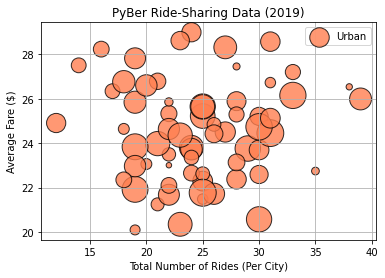

In [56]:
# Urban analysis bubble chart

plt.scatter(urban_ride_count,urban_avg_fare, s = urban_driver_count*10, c = "coral", edgecolor = "black", linewidths= 1, alpha = 0.8, label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend();

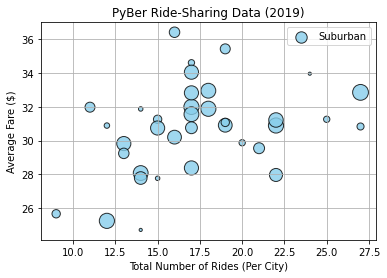

In [60]:
# Suburban analysis bubble chart

plt.scatter(suburban_ride_count,suburban_avg_fare, s = suburban_driver_count*10, c = "skyblue", edgecolor = "black", linewidths= 1, alpha = 0.8, label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend();

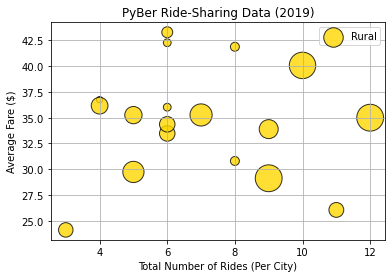

In [62]:
# Rural analysis bubble chart

plt.scatter(rural_ride_count,rural_avg_fare, s = rural_driver_count*10, c = "gold", edgecolor = "black", linewidths= 1, alpha = 0.8, label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend();

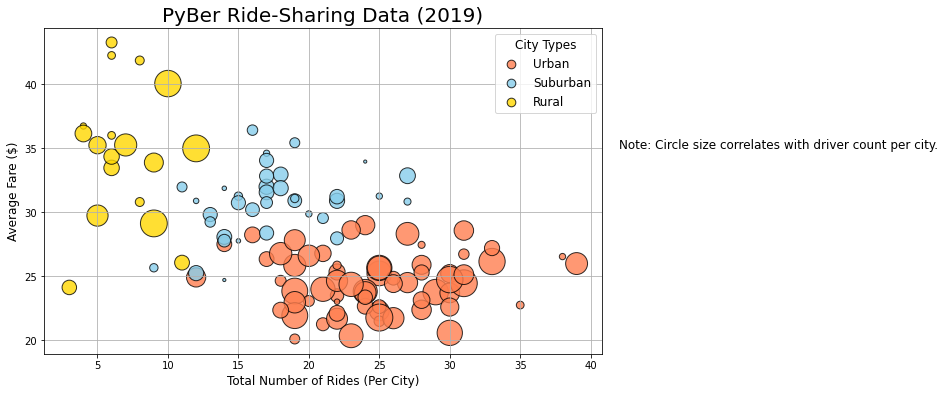

In [71]:
# Total analysis bubble graph
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count,urban_avg_fare, s = urban_driver_count*10, c = "coral", edgecolor = "black", linewidths= 1, alpha = 0.8, label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend();

plt.scatter(suburban_ride_count,suburban_avg_fare, s = suburban_driver_count*10, c = "skyblue", edgecolor = "black", linewidths= 1, alpha = 0.8, label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend();

plt.scatter(rural_ride_count,rural_avg_fare, s = rural_driver_count*10, c = "gold", edgecolor = "black", linewidths= 1, alpha = 0.8, label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend();

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysisFig1.png")
